In [1]:
%reset -f

In [2]:
#imports
from scipy.io.wavfile import read, write
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#%matplotlib notebook

# Diseño del filtro de producto en frecuencia
el filtro ideal pero a nadie le gusta excepto a mí.

In [3]:
#frecprodfilter -> fprodf
def fprodf(x_in,fs,fc1,fc2=0,ftype="lowpass"):
    '''
    The audio must be normalized
    '''
    
    #design of the filter
    fbins=2**int(np.ceil(np.log2(len(x)))) #M
    u=fbins/fs
    k1=int(fc1*u)
    k2=int(fc2*u)
    H=np.zeros(fbins,dtype=np.complex_)
    
    if ftype=="lowpass":
        H[0:k1]=np.ones(k1,dtype=np.complex_)
        H[-k1:]=np.ones(k1,dtype=np.complex_)
    elif ftype=="highpass":
        H[k1:-k1]=np.ones(fbins-2*k1,dtype=np.complex_)
    elif ftype=="bandpass":
        Bw=abs(k2-k1)
        H[k1:k2]=np.ones(Bw,dtype=np.complex_)
        H[-k2:-k1]=np.ones(Bw,dtype=np.complex_)
    elif ftype=="bandstop":
        H[0:k1]=np.ones(k1,dtype=np.complex_)
        H[k2:-k2]=np.ones(fbins-2*k2,dtype=np.complex_)
        H[-k1:]=np.ones(k1,dtype=np.complex_)
    else:
        print("KeyError: ftype not recognised on frecprodfilter.")
        return 1
    
    #fourier transform of the signal
    X=np.fft.fft(x_in,fbins)
    #filter product with the signal
    Y=H*X
    #time/sampling-domain signal
    y=np.fft.ifft(Y,fbins)[:len(x_in)]
    
    return y, Y, X

In [4]:
#Audio
file_audio=('../audios/audio1.wav')
fs,x=read(file_audio)
x=x/float(max(abs(x)))
x=x-np.mean(x)
t=np.arange(0,float(len(x))/fs,1/fs)

<ipython-input-4-40e98b968281>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs,x=read(file_audio)


In [5]:
#Filtering
y,Y,X=fprodf(x,fs,1024,0,"lowpass")

/home/santiagoguiral/Documents/.venv/basics/mp-np-p-sp-sy/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


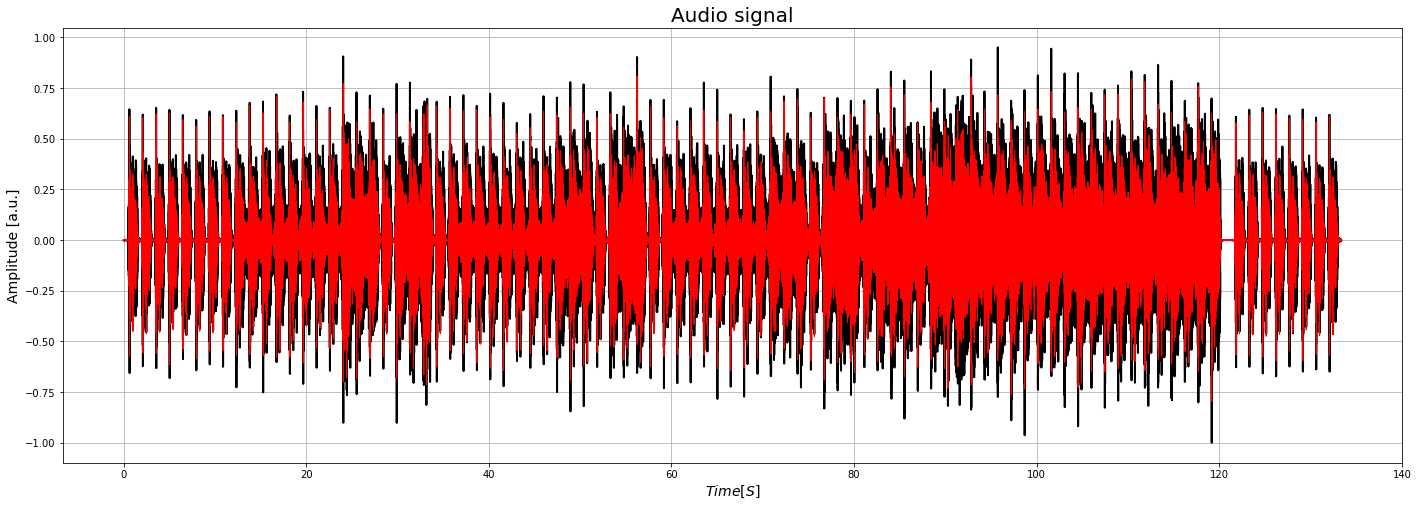

In [6]:
plt.figure(figsize=(24,8))
plt.plot(t,x,linewidth=2,color="k")
plt.plot(t,y,linewidth=1,color="r")
plt.xlabel("$Time [S]$",fontsize=14)
plt.ylabel("Amplitude [a.u.]",fontsize=14)
plt.title("Audio signal",fontsize=20)
plt.grid()
plt.show()

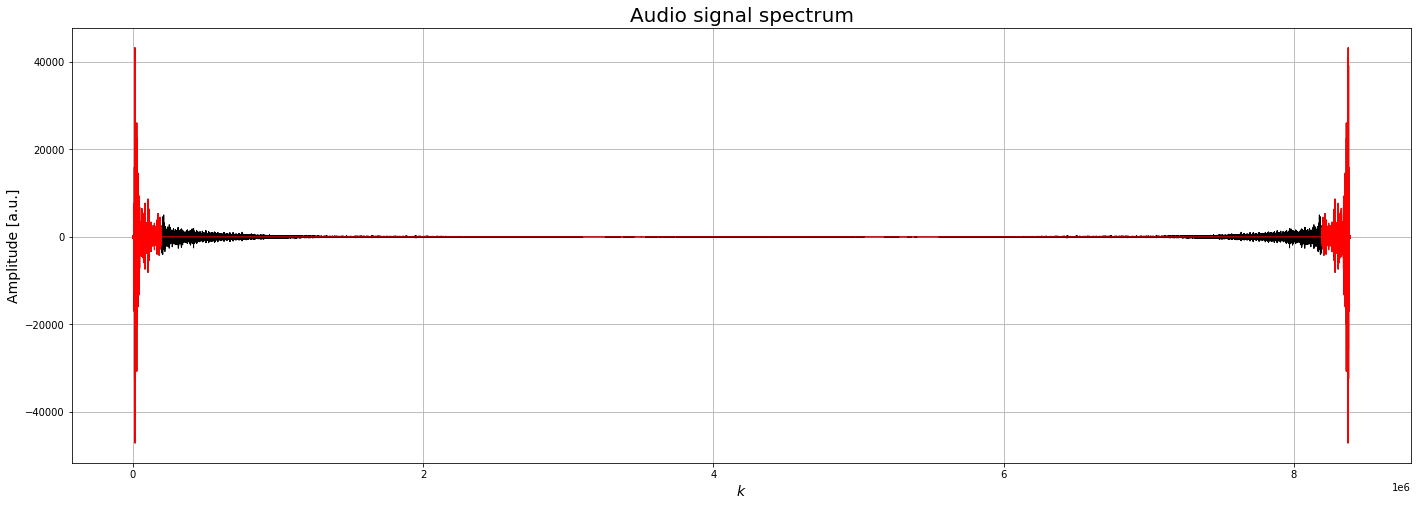

In [7]:
plt.figure(figsize=(24,8))
plt.plot(np.real(X),linewidth=1,color="k")
plt.plot(np.real(Y),linewidth=1,color="r")

plt.xlabel("$k$",fontsize=14)
plt.ylabel("Amplitude [a.u.]",fontsize=14)
plt.title("Audio signal spectrum",fontsize=20)

plt.grid()
plt.show()

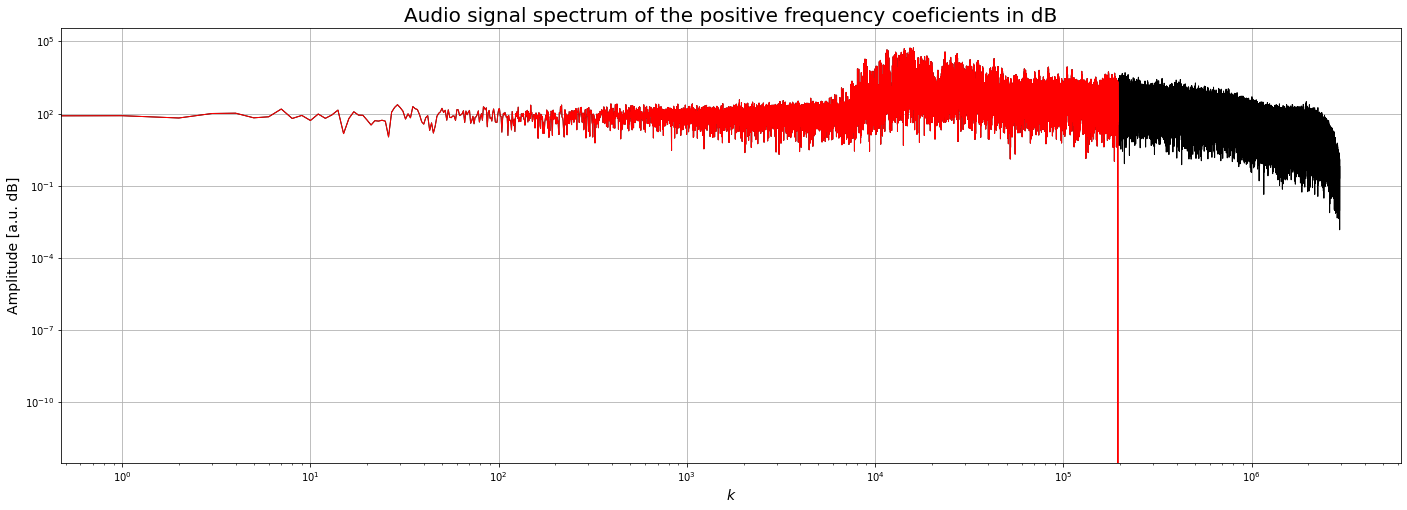

In [8]:
plt.figure(figsize=(24,8))
plt.plot(np.absolute(X[:len(x)//2]),linewidth=1,color="k")
plt.plot(np.absolute(Y[:len(x)//2]),linewidth=1,color="r")
plt.xscale('log')
plt.yscale('log')

plt.xlabel("$k$",fontsize=14)
plt.ylabel("Amplitude [a.u. dB]",fontsize=14)
plt.title("Audio signal spectrum of the positive frequency coeficients in dB",fontsize=20)

plt.grid()
plt.show()

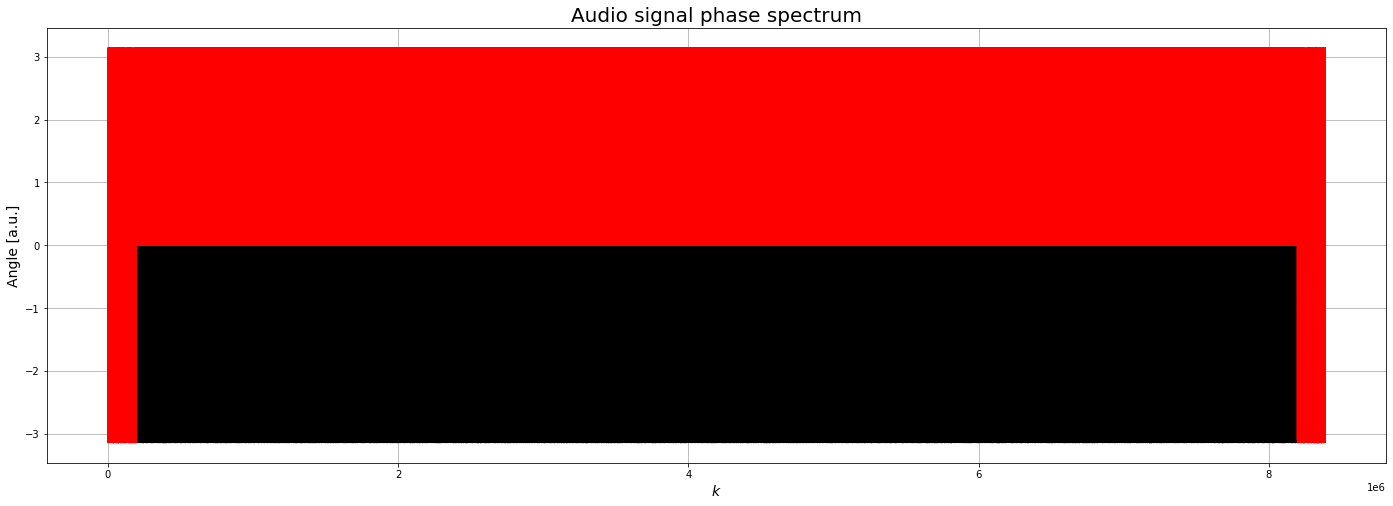

In [9]:
plt.figure(figsize=(24,8))
plt.plot(np.angle(X),linewidth=0.5,color="k")
plt.plot(np.angle(Y),linewidth=0.5,color="r")

plt.xlabel("$k$",fontsize=14)
plt.ylabel("Angle [a.u.]",fontsize=14)
plt.title("Audio signal phase spectrum",fontsize=20)

plt.grid()
plt.show()

In [10]:
from IPython.display import Audio
#Audio(y,rate=fs)